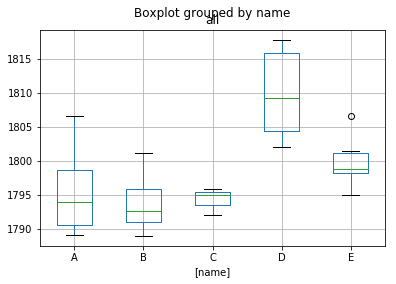

In [2]:
import pandas as pd

df0 = pd.read_csv('data/stat0.csv')

def process(df, val_col):
    dfr = df.loc[:,['name', val_col]].sort_values(by=['name', val_col]).groupby('name', as_index=False).apply(lambda grp: grp.iloc[2:-2])
    dfr.to_csv('data/{}-percentiled.csv'.format(val_col), index=False)
    return dfr
    
process(df0, 'all').boxplot(by='name')
#process('cpu').boxplot(by='name')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

df0 = pd.read_csv('data/stat0.csv')

def process_agg(df, val_col):
    dfr = df.loc[:,['name', val_col]].groupby('name', as_index=False).apply(lambda grp: grp.iloc[2:-2])
    dfr = dfr.groupby('name').agg([np.min, np.median, np.max])
    dfr = pd.DataFrame(dfr.to_records())
    dfr.columns = ['name', 'min', 'median', 'max']
    dfr.to_csv('data/{}-agg.csv'.format(val_col), index=False)
    return dfr

df = process_agg(df0, 'all')
df

  name       min    median       max
0    A  1786.165  1794.837  1807.391
1    B  1782.901  1792.965  1810.074
2    C  1788.896  1793.613  1796.643
3    D  1796.674  1806.654  1828.625
4    E  1794.174  1798.694  1811.183
